<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Introduction to quantum mechanics</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
from IPython.core.display import HTML, Image
#css_file = 'style.css'
#HTML(open(css_file, 'r').read())
#css_file = 'style.css'
HTML(open('style.css', 'r').read())

In [2]:
from sympy import init_printing
from warnings import filterwarnings

In [3]:
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

In [4]:
from sympy import I, sqrt, Matrix, diag, symbols
from sympy.physics.quantum import Dagger

# Operators

## Introduction

An operator in quantum mechanics (QM) is a mathematical rule that acts on a ket (or on a bra).  After acting on a ket, you have another ket (which might even be exactly the one you started with or the one you started with multiplied by a scalar.<br>
It's almost like a function (a rule that maps one set of values to another) in algebra:
$$ {f} \left( {x} \right) = {x}^{2} $$
In QM, though we have:
$$ {A} \left|\psi \right> = \left|\psi ' \right>$$
It works for bra vectors too (just remember, we are representing states as column vectors, so the rules of matrix multiplication apply)
$$ \left<\psi\right|{A}^{*}=\left<\psi '\right| $$

In QM we'll use the terms *states* and *observables*.  States are describe by vectors in a vector space, whereas observables are things we can measure, such as the energy or momentum of a particle.  In our examples above that would be the ** *A* **.  It acted on the $ \left| \psi \right> $ vector, which returned a $ \left| \psi '  \right> $ vector.

We could even throw in a multiple of $ \left| \psi \right> $, say for example a complex number *z* and get: $$ {A}{z}\left| \psi \right> =  {z} \left| \psi ' \right> $$

As with algebra where we multiply by one or in linear algebra where we multiply by the identity matrix and NOT change anything, we have the following in bra-ket notation:
$$ {I} \left| \psi \right> = \left| \psi \right> $$

An operator can also act on a sum of vectors:
$$ A\left\{ \left| \psi  \right> +\left| \phi  \right>  \right\} =A\left| \psi  \right> +A\left| \phi  \right>  $$

+ Without explaining much, here are some awesome operators:
    + Gradient operator
    $$ \nabla |\psi >=\frac { \partial  }{ \partial x } |\psi >\hat { i } +\frac { \partial  }{ \partial y } |\psi >\hat { j } +\frac { \partial  }{ \partial z } |\psi >\hat { k }  $$
    + Hamiltonian operator which gives the scalar *E*, the energy
    $$ {\hat H}|\psi >=E|\psi > $$
    + Linear momentum operator
    $$ {\hat P}|\psi >=-i\hbar \nabla |\psi > $$
        + In one dimension that will be
        $$ {\hat P}|\psi >=-i\hbar \frac{\partial}{\partial x} |\psi > $$
    + Laplacian operator (to find the Hamiltonian operator)
    $$ { \nabla  }^{ 2 }|\psi >=\nabla \cdot \nabla |\psi >=\frac { { \partial  }^{ 2 } }{ \partial { x }^{ 2 } } |\psi >\hat { i } +\frac { { \partial  }^{ 2 } }{ \partial { y }^{ 2 } } |\psi >\hat { j } +\frac { { \partial  }^{ 2 } }{ \partial { y }^{ 2 } } |\psi >\hat { k }  $$

### In sympy notation

In [5]:
from sympy import Matrix
from sympy.physics.quantum import Operator, Bra, Ket

In [6]:
A = Operator('A')
B = Operator('B')
k = Ket('psi')

In [7]:
A * k # The operator, A, times the ket vector, k

A⋅❘ψ⟩

Operators (which are matrices) do not commute

In [8]:
A.is_commutative, B.is_commutative

(False, False)

In [9]:
A * B == B * A

False

So we have something very special going on here:
$$ {\hat H}\left|\psi\right>=E\left|\psi\right> $$
*H*, is an operator (a matrix) which is multiplied by a ket vector.  It returns a scalar (*E*, which is the energy) times that same ket vector.<br>
Operators are special matrices that when multiplied by a column vector, yields a scalar multiple of that vector (scalar might be 1).  In the lecture on eigenvalues and eigenvectors you will note that this is exactly what we are dealing with.

## Back to dice space

Qm is all about probability.  What we are ultimately trying to develop the intuition for is the fact that we have these state vectors and observables (operators).  We have mathematical objects representing reality.  We have to do something to them to get a result, which we interpret as the value that multiple executions of an experiment wil average to.  This average is called the *expectation value*.<br/>
We can do this for our dice space experiment, that is, create an observable / operator matrix.  Look at what we can do:

In [10]:
# From the previous chapter
state = Matrix([[1], [sqrt(2)], [sqrt(3)], [sqrt(4)], [sqrt(5)], [sqrt(6)], [sqrt(5)], [sqrt(4)], [sqrt(3)], [sqrt(2)], [1]])
ket_psi = state.normalized()
bra_psi = Dagger(ket_psi)

So, we have created a ket vector and it's associated bra vector (through the use of the *Dagge()* function.  They have been normalized through the *.normalized()* method.  We can check if they form an orthonomal basis for our dice space.  Remember how to do that?

In [11]:
bra_psi * ket_psi

[1]

Now (without explanation), here is the operator (observable).

In [12]:
# Creating our operator
A = diag(2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12)
A

⎡2  0  0  0  0  0  0  0  0   0   0 ⎤
⎢                                  ⎥
⎢0  3  0  0  0  0  0  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  4  0  0  0  0  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  5  0  0  0  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  6  0  0  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  0  7  0  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  8  0  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  9  0   0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  10  0   0 ⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0   11  0 ⎥
⎢                                  ⎥
⎣0  0  0  0  0  0  0  0  0   0   12⎦

We calculate the expectation value like this
$$\left<\psi|A|\psi\right>$$

In [22]:
bra_psi * A * ket_psi

[7]

Indeed, we get the average value if the experiment (rolling two die) is repeated multiple times.<br/>
Now let's continue learning about these operators by looking at eigenvalues and eigenvectors.

## Eigenvalues and eigenvectors

We will use operators to act on ket vectors that are eigenvectors of that operator.  We looked at eigenvalues and eigenvectors in the previous chapter.<br>
Eigenvectors are innate vectors of a matrix such that when multiplying a matrix by (one of) it's eigenvectors yields that same eigenvector times a scalar (it's eigenvalue).  So, direction is maintained, only the magnitude may change.

In [23]:
# A matrix, A
A = Matrix([[1, 2], [2, 1]])
A

⎡1  2⎤
⎢    ⎥
⎣2  1⎦

In [24]:
# It's eigenvalues, how many there are and the corresponding eigenvector
A.eigenvects()

⎡⎛-1, 1, ⎡⎡-1⎤⎤⎞, ⎛3, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

Let's take the operator *A* and multiply it by one of its eigenvectors:
$$ A \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

In [25]:
# Creating an eigenvector
eigv1 = Matrix([[1], [1]])
eigv1

⎡1⎤
⎢ ⎥
⎣1⎦

In [26]:
A * eigv1

⎡3⎤
⎢ ⎥
⎣3⎦

In [27]:
# This is the same as 3 (the eigenvalue) times the eigenvector
A * eigv1 == 3 * eigv1

True

## Hermitian operators

A Hermitian operator is an operator that is equal to its *Hermitian adjoint* (*Hermitian conjugate*).  OK, so what's a Hermitian adjoint / Hermitian conjugate?<br>
Consider our operator function above:
$$ A \left| \psi \right> = \left| \psi ' \right> $$
What if we use the corresponding bra vectors?
$$ \left< \psi \right| A $$
Would this equal the bra vector, $ \left< \psi ' \right| $?  Short answer, NO!

We have to change $ A $ to its Hermitian adjoint first.  It's done by transposing and changing each element to its complex conjugate.  It is usually written with a dagger superscript, $ { A }^{ \dagger  }={ \left( { A }^{ T } \right)  }^{ * } $, where $ {A}^{T} $ is the transpose of $ A $ and $ {A}^{*} $ is the complex conjugate.  Now we have:
$$ \left< \psi \right| {A}^{\dagger} = \left< \psi ' \right| $$

A *Hermitian operator* is an operator which is identical to its Hermitian adjoint.

We will denote a Hermitian operator by $ \hat{H} $.  It is a very special operator, because it has the following special property:
$$ {\hat H} \left| \psi \right> = {\lambda}_{a} \left| \psi \right> $$
So, applying a Hermitian operator to a ket vector equals a real number $ {\lambda}_{a} $ times the same ket vector (with the added proviso that $ \left| \psi \right> $ is an eigenvector and $ {\lambda}_{a} $ is it's eigenvalue (see the previous chapter).  Later you will see than $ {\lambda}_{a} $ must be a real number.

Let's use some python&#8482; to illustrate Hermitian operator use.  We'll introduce an operator $ L $ which contain complex numbers.

In [29]:
L = Matrix([[1.5, -0.5 * I], [0.5 * I, 1.5]]) # A sympy matrix
L # Print to screen

⎡ 1.5   -0.5⋅ⅈ⎤
⎢             ⎥
⎣0.5⋅ⅈ   1.5  ⎦

In [30]:
# Is L indeed an Hermitian operator?
Dagger(L) == L

True

In [31]:
L.eigenvects()

⎡⎛1.0, 1, ⎡⎡1.0⋅ⅈ⎤⎤⎞, ⎛2.0, 1, ⎡⎡-1.0⋅ⅈ⎤⎤⎞⎤
⎢⎜        ⎢⎢     ⎥⎥⎟  ⎜        ⎢⎢      ⎥⎥⎟⎥
⎣⎝        ⎣⎣ 1.0 ⎦⎦⎠  ⎝        ⎣⎣ 1.0  ⎦⎦⎠⎦

Let's also create the two vectors *x* and *y* in &#8477;<sup>2</sup> for these two eigenvectors of $ L $.

In [32]:
x = Matrix([[I], [1]])
y = Matrix([[-I], [1]])

Let's determine their inner product $ \left< x | y \right> = {\left( {x}^{*} \right)}^{T} y $.  Note that $ {x}_{i} $ and $ {y}_{i} $ might be complex so the corresponding $ \left< x \right| $ and $ \left< y \right| $ is the complex conjugate.

In [33]:
x.adjoint() * y # See later: eigenvectors of a Hermitian operator are orthogonal

[0]

Suppose we introduce the operator $ L $ such that we calculate:
$$ \left<{x}\left|L\right|{y}\right> $$

In [34]:
# We created the matrix, L, above
x.adjoint() * L * y

[0]

Now we have an adjoint operator L such that:
$$ \left< y \left| {L}^{\dagger} \right| x \right> = \left< {x} \left| {L} \right| {y} \right> $$

$ {L}^{\dagger} $ is the adjoint or Hermitian conjugate of $ L $ (before we used *Dagger*()).  It's easy to calculate in python™.

In [35]:
L.adjoint() # Or use Dagger() from the sympy.physics.quantum submodule

⎡ 1.5   -0.5⋅ⅈ⎤
⎢             ⎥
⎣0.5⋅ⅈ   1.5  ⎦

Let's see what we get from:
$$ \left<y\left|{L}^{\dagger}\right|x\right> $$
Then use python™ Boolean logic to see if there is equality.

In [36]:
y.adjoint() * Dagger(L) * x

[0]

In [37]:
# Using Boolean logic to see of this is indeed correct
y.adjoint() * L.adjoint() * x == x.adjoint() * L * y

True

In [38]:
Dagger(x), x.adjoint() # Note the bars on top of the element to
# remind us that we are dealing with the complex conjugate
# Note also that the function Dagger() and the method .adjoint()
# are equivalent here

([-ⅈ  1], [-ⅈ  1])

Let's see why Hermitian operators are so important!

### The eigenvalues of Hermitian operators are real

Why are we interested in these special matrices called Hermitian matrices?  Well, we use them in QM because they work beautifully as physical observables.  One of the properties that make them so useful is that their eigenvalues are always real numbers.  Here is the proof.  Suppose we have a Hermitian operation $ A $ with eigenvalue $ \lambda $ and eigenvector $ \left| \lambda \right> $:
$$ A \left| \lambda \right> = \lambda \left| \lambda \right> \\ \left< \lambda \right| {A}^{\dagger} = \left< \lambda \right|{\lambda}^{*} \\ \because A = {A}^{\dagger} \\ A \left| \lambda \right> = \lambda \left| \lambda \right>, \quad \left< \lambda \right| A = \left< \lambda \right| {\lambda}^{*}  $$

If we multiply the last two equations throughtout each seperately $ \left< \lambda \right| $ and $ \left| \lambda \right> $ we have:
$$ \left< \lambda \right| {A} \left| \lambda \right> = \lambda \left< \lambda | \lambda \right> \\ \left< \lambda \right| {A} \left| \lambda \right> = {\lambda}^{*} \left< \lambda | \lambda \right> $$

This means $ \lambda = {\lambda}^{*} $, which is only possible with $ \lambda \in  $ &#8477;.

In [39]:
# From our Hermitian operator L above we have the following eigenvalues
L.eigenvals()
# The solution below states a single eigenvalue of 1 {1:1} and another single eigenvalue of 2 {2:1}

{1: 1, 2: 1}

### Any vector a Hermitian operator can generate can be expanded as a sum of its eigenvectors

### The eigenvectors associated with two separate eigenvalues of a Hermitian operator are orthogonal

Here's the proof:
$$ A \left| {\lambda}_{1} \right> = {\lambda}_{1} \left| {\lambda}_{1} \right> \\ A \left| {\lambda}_{2} \right> = {\lambda}_{2} \left| {\lambda}_{2} \right> \\ \because A = {A}^{\dagger} \\ \left< {\lambda}_{1} \right| A = {\lambda}_{1} \left< {\lambda}_{1} \right| \\ A \left| {\lambda}_{2} \right> = {\lambda}_{2} \left| {\lambda}_{2} \right> $$

For the last two equation we'll multiply individually with $ \left| {\lambda}_{2} \right> $ and $ \left< {\lambda}_{1} \right| $:
$$ \left< { \lambda  }_{ 1 } \right| A\left| { \lambda  }_{ 2 } \right> ={ \lambda  }_{ 1 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> \\ \left< { \lambda  }_{ 1 } \right| A\left| { \lambda  }_{ 2 } \right> ={ \lambda  }_{ 2 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> \\ { \lambda  }_{ 1 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> -{ \lambda  }_{ 2 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> =\left< { \lambda  }_{ 1 } \right| A\left| { \lambda  }_{ 2 } \right> -\left< { \lambda  }_{ 1 } \right| A\left| { \lambda  }_{ 2 } \right> \\ { \lambda  }_{ 1 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> -{ \lambda  }_{ 2 }\left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> =0\\ \left( { \lambda  }_{ 1 }-{ \lambda  }_{ 2 } \right) \left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> =0\\ \because \quad { \lambda  }_{ 1 }\neq { \lambda  }_{ 2 }\\ \left< { \lambda  }_{ 1 }|{ \lambda  }_{ 2 } \right> =0  $$

This is only possible if the eigenvectors are orthogonal.

What happens when $ {\lambda}_{1} = {\lambda}_{2} $?  Well, the eigenvectors can be chosen to be orthogonal.

Consider the following : $ {A} \left| {\lambda}_{1} \right> = \lambda \left| {\lambda}_{1} \right> \\ {A} \left| {\lambda}_{2} \right> = \lambda \left| {\lambda}_{2} \right> $.

We have two distinct eigenvectors, $ \left| {\lambda}_{1} \right> $ and $ \left| {\lambda}_{2} \right> $.  Let's create a linear combination of them (which is also an eigenvector), $ \left| C \right> = \alpha \left| {\lambda}_{1} \right> + \beta \left| {\lambda}_{2} \right> $.  Now we can operate on both sides with $ A $.

$ A \left| C \right> =\alpha A\left| { \lambda  }_{ 1 } \right> +\beta A\left| { \lambda  }_{ 2 } \right> \\ A\left| C \right> =\alpha \lambda \left| { \lambda  }_{ 1 } \right> +\beta \left| { \lambda  }_{ 2 } \right> \\ A\left| C \right> =\lambda \left( \alpha \left| { \lambda  }_{ 1 } \right> +\beta \left| { \lambda  }_{ 2 } \right>  \right) =\lambda \left| C \right>  $

If we have eigenvectors that are not orthonormal, but spans a space (i.e. is what is called a degenerate state), we can construct such a set to span the same space.<br>
It is done through the *Gram-Schmidt* procedure.  Simply project $ {\underline U}_{2} $ onto the unit vector, $ {\hat {u}}_{1} $ of $ {\underline {U}}_{1} $ by taking the innerproduct of $ {\underline {U}}_{1} $ and $ {\hat {u}}_{1} $.

$ { \hat { u }  }_{ 1 }=\frac { { \underline { U }  }_{ 1 } }{ \left| { \underline { U }  }_{ 1 } \right|  } \\ { \underline { U }  }_{ 2 }={ \underline { U }  }_{ 2\bot  }+\left< { \underline { U }  }_{ 2 }|{ \hat { u }  }_{ 1 } \right> \\ { \underline { U }  }_{ 2\bot  }={ \underline { U }  }_{ 2 }-\left< { \underline { U }  }_{ 2 }|{ \hat { u }  }_{ 1 } \right> \\ { \hat { u }  }_{ 2 }=\frac { { \underline { U }  }_{ 2\bot  } }{ \left| { \underline { U }  }_{ 2\bot  } \right|  }  $

## Commuting operators

+ In general, two operator do not commute:
$$ {LM} \neq {ML} $$
+ Applying operator L, then M is not the same as applying M, then L
+ These operators have commutators, which we write as follows:
$$ [L,M] = LM - ML $$

+ Obviously some operators do commute
+ This is the same as saying their commutator is zero: [L,M] = 0
    + First off, they commute if they are the same
    $$ [L,L] = 0 $$
+ We also note that for two separate operators, we have the following
$$ [L,M]=-[M,L] $$

+ Commutators are linear
$$ A\left( { c }_{ 1 }\left|\psi \right>+{ c }_{ 2 }\left|\psi \right> \right) ={ c }_{ 1 }A\left|\psi \right>+{ c }_{ 2 }A\left|\psi \right>\\ \left[ A,B+C+D+\dots  \right] =\left[ A,B \right] +\left[ A,C \right] +\left[ A,D \right] +\dots  $$

+ Then there is the anti-commutator:
$$ \left\{ {A,B} \right\}=AB+BA $$

+ Lastly we have the Hermitian adjoint of the commutator:
$$ { \left[ A,B \right]  }^{ \dagger  }=\left[ { B }^{ \dagger  },{ A }^{ \dagger } \right]  $$
+ If the operators are Hermitian operators (A<sup>&dagger;</sup> = A), then:
$$ { \left[ A,B \right]  }^{ \dagger  }=-\left[ A,B \right] $$

+ There is some sympy code for this

In [37]:
from sympy.physics.quantum import Operator, Commutator

In [38]:
A = Operator('A')
B = Operator('B')

In [39]:
Commutator(A, B)

[A,B]

In [40]:
Commutator(A, B).doit() # The .doit() method executes the Commutator

A⋅B - B⋅A

In [41]:
Dagger(Commutator(A, B)) # Assuming they are not
# Hermitian operators
# If they were, we would just get -[A,B]

 ⎡ †  †⎤
-⎣A ,B ⎦

In [42]:
C = Operator('C')

In [43]:
Commutator(A, B + C)

-[B + C,A]

In [44]:
Commutator(A, B + C).doit()

-((B + C)⋅A - A⋅(B + C))

## A unitary operator (matrix)

An operator is unitary if $ {A}^{\dagger} = {A}^{-1} $ (the adjoint equals the inverse).

If this is so, then $ {A}{A}^{\dagger} = {I} $, the identity matrix.  It is often denoted with a $ U $ so that $ {U}{U}^{\dagger} = {I} $.

The product of two unitary matrices is also unitary.

Unitary operator have the following effect on bra and ket vectors (the prime signs denotes complex conjugation): $ U\left|\psi \right>=\left|\psi '\right>\\ \left<\psi \right|{ U }^{ \dagger }=\left|\psi '\right> $.<br>
Unitary operators also have the following effect on operators: $ {U}{A}{U}^{\dagger} = {A} $.<br>
The eigenvalues of $ A $ and its unitary transformed version $ {U}{A}{U}^{\dagger} = {A} $ UAU<sup>&dagger;</sup> = A', are the same,<br>
+ If an operator is Hermitian, the its unitary transformed version, A', is also Hermitian
+ Commutators that are equal to complex numbers are unchanged by unitary transformations
$$ \left[ A':B' \right] =\left[ A:B \right]  $$

## Practical example

+ Dirac notation works well for explaining light polarization
+ In the first image below, we shine unpolarized as a vertically oriented slit, with only vertically polarized light exiting beyond
+ Light then passes through another similarly oriented slit and all of the light passes through
+ Not so when the polarized light encounters a slit that is orthogonal to the first

In [45]:
# Importing Image for the display submodules of the
# IPython module
from IPython.display import Image

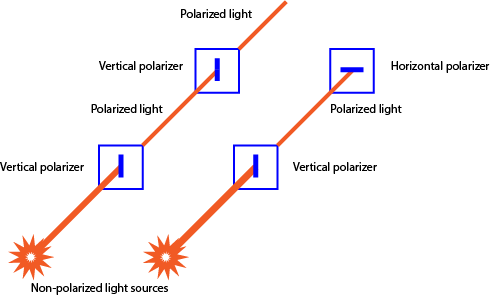

In [46]:
# Displaying an image to the screen
# This image is in the same folder as this IPython notebook
# file, which allows you to omit the folder path
Image('Photon_slit_1.png')

+ The energy of the light (its frequency and wavelength) does not change; there is just less photons
+ There is a probability of any photon going through
+ Turns out it is the *cos*<sup>2</sup> of the angle to the incident polarized light

+ The cosine might give you a clue as to where this is going
+ Remember the geometric equation for the dot product?
$$ \underline { a } \cdot \underline { b } =\left\| \underline { a }  \right\| \left\| \underline { b }  \right\| \cos { \theta  }  $$
+ We can set this up with two column vectors for the slits (without explaining why)
+ I'll use the computer variable name *vert_slit* for the vertical slit and call is vector **y** and *hor_slit* for the horizontal slit and call it vector **x**
+ Note that by this choice, they are already normalized (length of one)

In [47]:
vert_slit = Matrix([[0], [1]])
hor_slit = Matrix([[1], [0]])
vert_slit, hor_slit

⎛⎡0⎤, ⎡1⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣1⎦  ⎣0⎦⎠

+ Let's look at <*y*|*y*>; the photon going through two vertical slits

In [48]:
vert_slit.adjoint() * vert_slit

[1]

+ The solution is 1 (representing 100%), because the angle between the two is 0<sup>o</sup>

+ Now, let's look at the second experiment: <*y*|*x*>

In [49]:
vert_slit.adjoint() * hor_slit

[0]

+ No photon goes through (0%), again because *cos* 90<sup>o</sup> = 0

+ Now for some beautiful math!
+ Remember
$$ {H} \left| \psi \right> = { \lambda } \left| \psi \right> $$
+ There is a Hermitian operator, that when it acts on a state vector returns that state vector multiplied by a scalar
+ The state vector turns out to be an eigenvector of H and *&lambda;* turns out to be an eigenvalue of H
+ In our experiment *&psi;* is the eigenvector
+ The eigenvalue *&lambda;* is the result of our experiment

+ Let's construct just such a Hermitian matrix and give it the computer variable name Ex_1 for experiment 1
+ I will omit the explanation for the choice of this particular matrix

In [50]:
Ex_1 = Matrix([[1, 0], [0, -1]])
Ex_1.eigenvects()

⎡⎛-1, 1, ⎡⎡0⎤⎤⎞, ⎛1, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠⎦

+ It is Hermitian; we can check this with Boolean logic

In [51]:
Ex_1, Ex_1.adjoint()

⎛⎡1  0 ⎤, ⎡1  0 ⎤⎞
⎜⎢     ⎥  ⎢     ⎥⎟
⎝⎣0  -1⎦  ⎣0  -1⎦⎠

In [52]:
Ex_1 == Ex_1.adjoint()

True

+ Let's look at the eigenvalue

In [53]:
Ex_1.adjoint().eigenvals()

{-1: 1, 1: 1}

In [54]:
Ex_1.adjoint().eigenvects()

⎡⎛-1, 1, ⎡⎡0⎤⎤⎞, ⎛1, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠⎦

+ *Ex_1* can acts on two states (the two eigenvectors) and depending on which one it encounters, we get a result (the eigenvalue)
+ This eigenvalue is the only output we can actually get from our experiment
+ We see that we can get a negative and a positive one (-1 and +1)
+ I'll explain more about this setup, once we've looked at the next experiment

+ What if the second slit is at an angle of 45<sup>o</sup> to the first

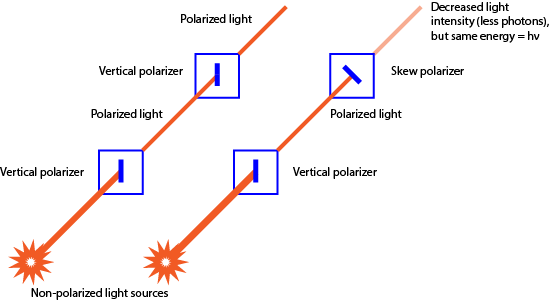

In [55]:
Image('Photon_slit_2.png')

+ We have to construct a column matrix for this slit
+ Note, that I drew it slanting left (backslash)
+ You can well imaging that as a small vector in a Cartesian plane with *x*-axis value of -1 and *y*-axis value of 1
$$ \begin{bmatrix} -1 \\ 1 \end{bmatrix} $$
+ This would almost be there, we just have to normalize this vector (divide each element by the length of the vector)

In [56]:
skew_slit = Matrix([[-1], [1]]).normalized()
skew_slit

⎡   ___ ⎤
⎢-╲╱ 2  ⎥
⎢───────⎥
⎢   2   ⎥
⎢       ⎥
⎢   ___ ⎥
⎢ ╲╱ 2  ⎥
⎢ ───── ⎥
⎣   2   ⎦

+ Now, let's send it through a vertical slit then the skew slit
+ What we get is the probability amplitude, which we have to square to get the probability

In [57]:
vert_slit.adjoint() * skew_slit

⎡  ___⎤
⎢╲╱ 2 ⎥
⎢─────⎥
⎣  2  ⎦

In [58]:
(vert_slit.adjoint() * skew_slit) ** 2

[1/2]

+ Indeed, the probability of a photon passing is now 50%

+ Let's look at the Hermitian operator of skew slits

In [59]:
Ex_2 = Matrix([[0, 1], [1, 0]])
Ex_2

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [60]:
Ex_2.adjoint()

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [61]:
Ex_2 == Ex_2.adjoint()

True

+ The computer variable *Ex_2* is a Hermitian operator and represents our experiment (also called an observable or a measurable)
+ I will leave the explanation of how this particular operator was devised until later
+ It can act on (at least) two states (the eigenvector states) and produce the same state as we started with and produce a result for that *eigenstate*, the eigenvalue
    + A Hermitian matrix of at least size 2 &times; 2 will have at least two eigenvectors and eigenvalues
    + The eigenvectors are orthogonal
        + Every Hermitian operators will have its own eigenvectors; the states they can act on
    + The eigenvalues represent the result of our experiment, i.e. we can attach two lights to our experiment
        + If one eigenvalue is found one light goes on to indicate to us the particular result
        + Other light would indicate other outcomes (eigenvalues)
+ *Ex_2* represents an experiment with a slit receiving light ploraized at 45<sup>o</sup> to it

In [62]:
Ex_2 * skew_slit

⎡   ___ ⎤
⎢ ╲╱ 2  ⎥
⎢ ───── ⎥
⎢   2   ⎥
⎢       ⎥
⎢   ___ ⎥
⎢-╲╱ 2  ⎥
⎢───────⎥
⎣   2   ⎦

+ So, we got back exactly the same eigenvector if we take the eigenvalue to be negative one (-1)

+ Let's look at the eigenvalues and eigenvectors of *Ex_2*

In [63]:
Ex_2.eigenvects()

⎡⎛-1, 1, ⎡⎡-1⎤⎤⎞, ⎛1, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

+ So, we have to pay attention here
+ Indeed the first eigenvalue was negative one [(**-1**, 1, ...
    + The result of our python™ code tells us that there is one such eigenvalue [(-1, **1**, ...
    + It is associated a single eigenvector
    + Note that it is:
    $$ \begin{bmatrix}-1\\1\end{bmatrix} $$
    + Don't let this bug you!
    + Our *skew_slit* eigenvector is simply as scalar multiple of this!
    + If we normalized the eigenvector we actually get our eigenvector!
+ More so, the second eigenvectors (state) is:
$$ \begin{bmatrix}1\\1\end{bmatrix} $$
    + Again, normalizing it gives the other state for this Hermitian operator
    + You guessed it, the *forward slash* slant
    + It has a different outcome (eigenvalue = 1)
+ In summary, our Hermitian operator can act on only two states and depending on what state it found we get a different experimental results (eigenvalue; perhaps, as I said, a light on our apparatus)

## To summarize

+ Considering our photon polarization example above and from the previous chapter, we have:
    + Preparing a photon in state |*y*> to go through slit |*x*> is given by the inner product:
    $$ \left<{x}|{y}\right> $$
    + Here <*x*| is the transpose of |*x*> with each element changed to its complex conjugate
    + The inner product results in the probability amplitude
    + We need to square it to get the probability:
    $$ \left< x|y \right> { \left< x|y \right>  }^{ * }={ \left| \left< x|y \right>  \right|  }^{ 2 } $$

+ For a slit of any angle *&theta;* we will have the following situation (bearing in mind that the length is always normalized to one)

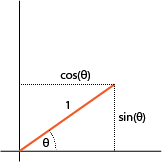

In [64]:
Image(filename = 'Slit.png')

+ For this our ket state vector will be:
$$ \left| \theta \right> = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix} $$
+ This can be written as:
$$ \cos \theta \left| x \right> + \sin \theta \left| y \right> $$

+ Look carefully again at |*x*>
$$ \left| x \right> = \begin{bmatrix}1\\0\end{bmatrix} \\ \left| x \right> = 1 \left| x \right> + 0 \left| y \right> $$
+ It reads:
    + The probability of a horizontally polarized photon going through a horizontal slit is 1<sup>2</sup> (we have to square)
    + The probability amplitude was thus 1 and the probability 1<sup>2</sup>
+ So, with probability amplitude of a horizontally polarized photon going through a slit at *&theta;* angles to the horizontal is cos*&theta;*, with the probability of cos<sup>2</sup>*&theta;*

+ With our 45<sup>o</sup> skew slit we would have the situation:
$$ \begin{bmatrix} \frac { -\sqrt { 2 }  }{ 2 }  \\ \frac { \sqrt { 2 }  }{ 2 }  \end{bmatrix}=\frac { -\sqrt { 2 }  }{ 2 } \left|x\right>+\frac { \sqrt { 2 }  }{ 2 } \left|y\right>\\ \begin{bmatrix} \frac { -\sqrt { 2 }  }{ 2 }  \\ \frac { \sqrt { 2 }  }{ 2 }  \end{bmatrix}=\frac { -\sqrt { 2 }  }{ 2 } \begin{bmatrix} 1 \\ 0 \end{bmatrix}+\frac { \sqrt { 2 }  }{ 2 } \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$
+ Being horizontally polarized then going through the skew slit would have a probability amplitude of:
$$ \frac { -\sqrt { 2 }  }{ 2 } $$
+ This is a probability of &frac12;
+ Being vertically polarized then going through the skew slit would have a probability amplitude of:
$$ \frac { \sqrt { 2 }  }{ 2 } $$
+ This is a probability of &frac12;